# COGS 118A - **Final Project**

# Heart Disease Classification


# Names

- Kareema Kilani
- Rich Liu
- Ramsey Cervantes
- Abigail Sawtell
- Joshua Suh

# **Abstract** 

We will be analyzing key indicators of heart disease in order to classify individuals who are at risk of developing heart disease. Factors like genetics, environmental impact, and personal habits all play a role in whether an individual will develop heart disease. Being able to identify which individuals have a high likelihood of developing heart disease using these factors is really helpful for early detection and preventative care. Additionally, our goal is to create a model that can correctly identify individuals who are likely to develop heart disease that may not have some of the main indicators like smoking, BMI, etc. Being able to identify these individuals will prevent them from going undetected using traditional screening methods and thus being unable to take steps to treat their heart disease. The factors in our dataset are a combination of continuous features, like age, and categorical data, like whether an individual smokes or not, which will be one-hot encoded. We will be using a combination of multiple classification models, like SVM and random forest, to find the model with the highest accuracy of being able to identify whether an individual has heart disease. Performance of our project will be the accuracy of our model measured against a training set that includes the true status on whether the individual has heart disease or not.



# **Background**

A recent study, “Heart Disease Diagnosis and Prediction Using Machine Learning and Data Mining Techniques: A Review” focuses on how we live in a day and age where data mining techniques from the healthcare industry are producing massive amounts of data but are not effectively used and often wasted. <a name="sota"></a>[<sup>[1]</sup>](#sotanote) The reviews consisted of summaries of 35 studies exploring the “computational methods to predict heart diseases.” The datasets used were from a variety of institutions, most common were machine learning repositories of UC Irvine, survey, Cleveland Heart Disease Database, survey data, and publicly available hospital data.

The review first covers some popular data mining algorithms and data mining tools used for the data analysis purpose used for heart disease prediction that are used throughout studies.

**Data Mining Algorithms**: 

*   Decision Trees: C4.5, ID3, J48, K-means Algorithm, Support Vector Machine (SVM) , Naive Bayes (NB), Artificial Neural Network (ANN), CART - Classification and Regression Trees methodology, Random Forest, and Regression, A-Priori Algorithms, Fuzzy Logic, and Association Rules

**Data Mining Tools:**

*   Waikato Environment for Knowledge Learning (WEKA), RapidMiner, TANAGRA, Apache Mahout, MATLAB, Java, C, and Orange

The review dives into some techniques that were of interest to our group most notably, SVM and random forest. We wanted to look into the studies from the review that apply random forest and SVM. The first study used a combination of mainly (SVM), MLP neural network architecture, and artificial neural network (ANN).<a name="sota"></a>[<sup>[2]</sup>](#sotanote) They used 13 variables consisting of age, sex, chest pain type, resting blood pressure, cholesterol, fasting blood sugar, resting ECG, maximum heart rate, exercise-induced angina, old peak, slope, number of vessels colored, and thal. It’s important to mention that the data they use is mainly numerical data that attribute to the tests taken from their physician versus our dataset which is mostly demographic and daily habitual data. 

Support Vector Machine classifiers the presence of heart disease or absence of heart disease with 80.41% accuracy 
Artificial Neural Network classifiers the data into 5 clusters of heart disease with 97.5% accuracy
 
They conclude by explaining how physicians can use their methods in any clinic to help the physician with accurate decision support systems.

A similar study used the same dataset including two other datasets but deployed different methods, including logistic regression, random forest, and SVM <a name="sota"></a>[<sup>[3]</sup>](#sotanote) The goal was to apply the different methods across all the datasets to determine the highest accuracy. Random forest scored between 74% to 84%,  Logistic regression scored 79% to 80%, and SVM scored 75% to 86% between all the datasets. They concluded “only a marginal success is achieved in the creation of a predictive model for heart disease patients and hence there is a need for combinational and more complex models to increase the accuracy of the predicting the early onset of heart disease”

Underlying trends they identified throughout all the papers were if the disease is detected early then it can be kept under control and be treated. A recommendation to exercise daily and remove unhealthy habits at the earliest can lead to positive indications. Chances of stroke and heart diseases are higher when individuals have indicated tobacco consumption and unhealthy diets. <a name="sota"></a>[<sup>[4]</sup>](#sotanote)

Overall the review states “These works show that rather than applying a single mining technique on a data set, results are far better if a collection of mining techniques are used.” Since there are a variety of tools used, a combination of carefully chosen mining techniques and accurate implementation yields a fast and effective implementation of a system for heart disease management. The most common classifiers used are Decision trees, Naïve Bayes, artificial neural networks, association rule mining, and fuzzy logic. Although these classification techniques are key to a prediction system, they found studying various data cleaning and pruning techniques that prepare and make a dataset suitable for mining was going unnoticed and omission of these techniques can affect the accuracy of a model.


# **Problem Statement**

Using a pipeline of classification models, we should be able to predict whether an individual has heart disease when provided with their family history, and habitual and demographical data. Our goals in this paper is to answer the following questions: \\
1.   Which factors (features) are the most integral in predicting an individual’s predisposition to heart disease, and how can we utilize this information? And,
2.   Which model (SVM, random forest, decision tree) provides the most accurate results, and how can we optimize it further to produce better predictions?

We want to address these questions because heart diseases are still leading causes of death in the United States. Therefore, being able to efficiently and accurately screen patients for it might lead to saving many more lives, especially if they may not exhibit the typical risk factors.     


# **Data**



We plan on using the Personal Key Indicators of Heart Disease dataset
(https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
which contains 18 variables and 300k+ observations. Each observation consists of a participant's response to a question regarding their health; these observations include categorical, ordinal, real valued responses. One critical variable we will be looking at is Heart Disease which is respresented as a Yes/No response and we will use this to help test our accuracy. The dataset is already cleaned and ready for use in our project.
  
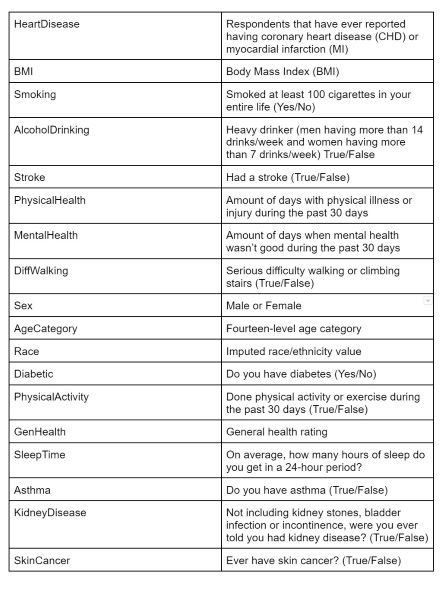

### **Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import io
#packages used later for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from numpy import arange
from sklearn.linear_model import Lasso, LinearRegression, LassoCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_squared_error

Mounted at /content/drive


### **Import and Cleaning Data**

In [2]:
#import csv

raw_df = pd.read_csv("/content/drive/MyDrive/Cogs 118A/heart_2020_cleaned.csv")

#Converting Age Category to be numeircal value by the first value in that group 
raw_df = raw_df.replace({'AgeCategory': {'18-24': 18, '25-29': 25, '30-34': 30, '35-39': 35,
                                 '40-44': 40, '45-49': 45, '50-54': 50,'55-59':55,
                                 '60-64': 60, '65-69':65, '70-74': 70, '75-79':75,
                                 '80 or older':80 }})

#Converting 'Diabetic' column to binary by considering 
#'No, borderline diabetes' to be No (0)
#'Yes (during pregnancy)' to be Yes (1)

raw_df = raw_df.replace({'Diabetic': {'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1}})


#Looping through the data to convert yes and no binary and sex to be binary 
for col in raw_df:
    
    if raw_df[col].dtypes == object and raw_df[col].nunique() == 2:
        
        raw_df = raw_df.replace({col: {'Yes': 1, 'No': 0}})
        raw_df = raw_df.replace({col: {'Male': 1, 'Female': 0}})

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Race' column 
encoder_df = pd.DataFrame(encoder.fit_transform(raw_df[['Race']]).toarray())

#renaming columns
encoder_df.columns = ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']

df  = pd.DataFrame()

#merge one-hot encoded columns back with original DataFrame
df = raw_df.join(encoder_df)

#drop 'team' column
df.drop(['Race', 'GenHealth'], axis=1, inplace=True)

#view final df
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SleepTime,Asthma,KidneyDisease,SkinCancer,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
0,0,16.60,1,0,0,3.0,30.0,0,0,55,...,5.0,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,80,...,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,65,...,8.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,24.21,0,0,0,0.0,0.0,0,0,75,...,6.0,0,0,1,0.0,0.0,0.0,0.0,0.0,1.0
4,0,23.71,0,0,0,28.0,0.0,1,0,40,...,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60,...,6.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35,...,5.0,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45,...,6.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25,...,12.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
encoder_df = pd.DataFrame(encoder.fit_transform(raw_df[['Race']]).toarray())

raw_df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [4]:
#Check One Hot Encodeder was done correctly
for x in ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']:

  if df[x].value_counts()[1] == raw_df['Race'].value_counts()[x]:

    print(True)

#Checks all values are numerical 
df.dtypes

True
True
True
True
True
True


HeartDisease                        int64
BMI                               float64
Smoking                             int64
AlcoholDrinking                     int64
Stroke                              int64
PhysicalHealth                    float64
MentalHealth                      float64
DiffWalking                         int64
Sex                                 int64
AgeCategory                         int64
Diabetic                            int64
PhysicalActivity                    int64
SleepTime                         float64
Asthma                              int64
KidneyDisease                       int64
SkinCancer                          int64
American Indian/Alaskan Native    float64
Asian                             float64
Black                             float64
Hispanic                          float64
Other                             float64
White                             float64
dtype: object

In [5]:
df.to_csv('final_heart.csv', index=False)

# **Proposed Solution**
The solution is to use machine learning algorithms such as linear/multivariate regression, SVM with different kernels, and random forest to try to determine whether someone has heart disease or not. In order to determine the best algorithm for doing so, we will plot a confusion matrix in order to determine the recall, specificity, precision and accuracy of each model. Then we are able to choose the best performing model for this problem. We will be using SKlearn for these supervised learning methods if allowed, or implementing from scratch. There isn't a benchmark model for this particular dataset, however since we have the correct labels in this dataset we can evaluate the performance against it. The benchmark for this particular problem domain of determining whether someone has heart disease is Artificial Neural Networks as discussed in the background section. 

#**Evaluation Metrics**

The evaluation metric used to quantify performance for the machine algorithms we use are going to be precision, specificity, recall, and accuracy. In our study, we will factor these variables into context in order to find the model with the best practical application. Each of these values will be calculated from confusion matrix created for each algorithm we implement. These metrics are appropriate for our problem domain of evaluting whether someone has a high likelihood of heart disease because it answers questions about accuracy, which is how many classifications the algorithm got correct compared to the true labels. \\
In addition, since we are dealing with a situation where a false negative would mean a patient who has heart disease is predicted to not have one, we will put closer attention to minimizing the false negative rate ($\frac{\text{false negative}}{\text{true positive + false negative}}$) when testing each model. 

To specify our metrics:
1. Precision is the ratio between true positives and the sum of true positives and false positives. \\
  * In our project's scope, precision answers the following question: Out of all the people who we predicted to have a heart disease, how many of those actually have a heart disease?
2. Specificity is the ratio between true negatives and the sum of true negative and false postive. 
  * In our project's scope, specifity answers the following question: Out of all the people who are healthy, how many of those did we correctly predict?
3. Recall is the ratio between true positives and the sum of true positives and false negatives.
  * In our project's scope, recall answers the following question: Out of all the people who have heart disease, how many of those did we correctly predict? 
 
Here is an example confusion matrix below.

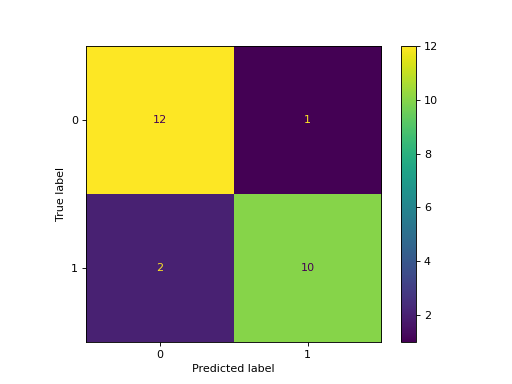

# **Results**



## EDA
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We began our exploration of the data by looking at visualizations of each variable, separated by Heart Disease diagnosis. We saw some trends that may indicate some variables are better suited for determining whether an individual has heart disease. For example, we notice that Mental Health and Physical Health have almost as many individuals with Heart Disease as without Heart disease around the 30 day mark. This leads us to expect that those who experience physical injury or illness and/or mental health struggles for almost every day for the past 30 days will experience higher rates of heart disease.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Additionally, we expect that some of our variables may be correlated. Consider an individual who consumes alcohol often and is a smoker. We would expect this individual to have a greater number of days that they experience physical illness, meaning a larger number in Physical Health. Due to this possible correlation we must be careful about the models we choose to implement.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Lastly, through our analysis of the data we notice that there is a significantly larger proportion of White individuals included. We understand that Race is often a key factor in an individual's risk factor for certain conditions, however, since our data set includes such a small sampling of Black, Asian, American Indian/Alaskan Native, Hispanic, or Other races we have to be wary of bias being introduced to our model. If our model is trained on predominately White training data, it will not generalize well to the greater population. This would have potentially dangerous implications because our model would be much more likely to misdiagnose people of color.  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We ran the linear regression on the whole dataset but resulted in an accuracy of 0.12 and there isn’t much tuning that can be done with sklearn linear regression so we chose to exclude it from our results. 


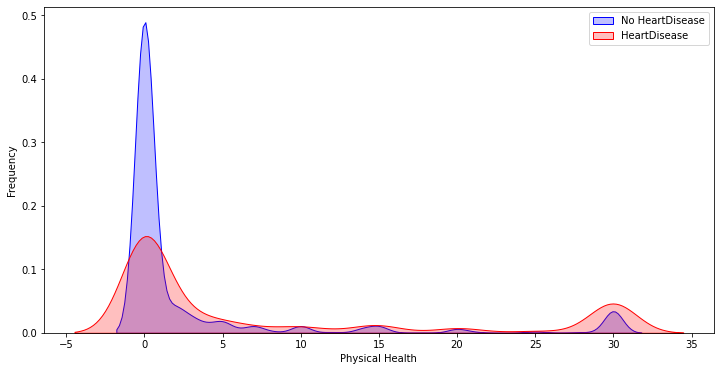

In [6]:
#Physical Health plot
yes = raw_df[raw_df["HeartDisease"]==1]
no = raw_df[raw_df["HeartDisease"]==0]


fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(no["PhysicalHealth"], shade = True, color="b", label="No HeartDisease", ax = ax)
sns.kdeplot(yes["PhysicalHealth"],shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("Physical Health")
ax.set_ylabel("Frequency")
ax.legend()

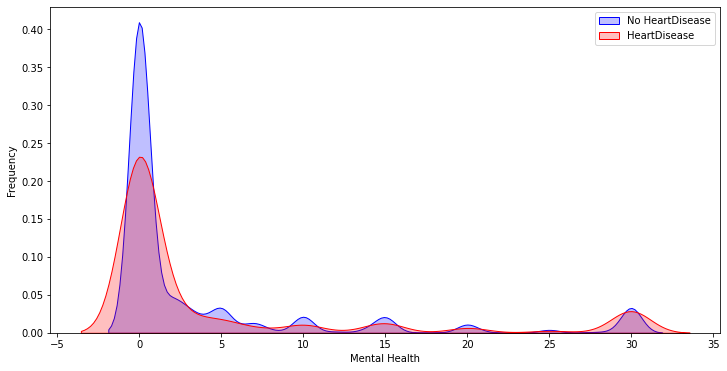

In [7]:
#Mental Health plot
fig, ax = plt.subplots(figsize = (12,6))
sns.kdeplot(no["MentalHealth"], shade = True, color="b", label="No HeartDisease", ax = ax)
sns.kdeplot(yes["MentalHealth"],shade = True, color="r", label="HeartDisease", ax = ax)
ax.set_xlabel("Mental Health")
ax.set_ylabel("Frequency")
ax.legend()

Additionally, we expect that some of our variables may be correlated. Consider an individual who consumes alcohol often and is a smoker. We would expect this individual to have a greater number of days that they experience physical illness, meaning a larger number in Physical Health. Due to this possible correlation we must be careful about the models we choose to implement.

Lastly, through our analysis of the data we notice that there is a significantly larger proportion of White individuals included. We understand that Race is often a key factor in an individual's risk factor for certain conditions, however, since our data set includes such a small sampling of Black, Asian, American Indian/Alaskan Native, Hispanic, or Other races we have to be wary of bias being introduced to our model. If our model is trained on predominately White training data, it will not generalize well to the greater population. This would have potentially dangerous implications because our model would be much more likely to misdiagnose people of color.

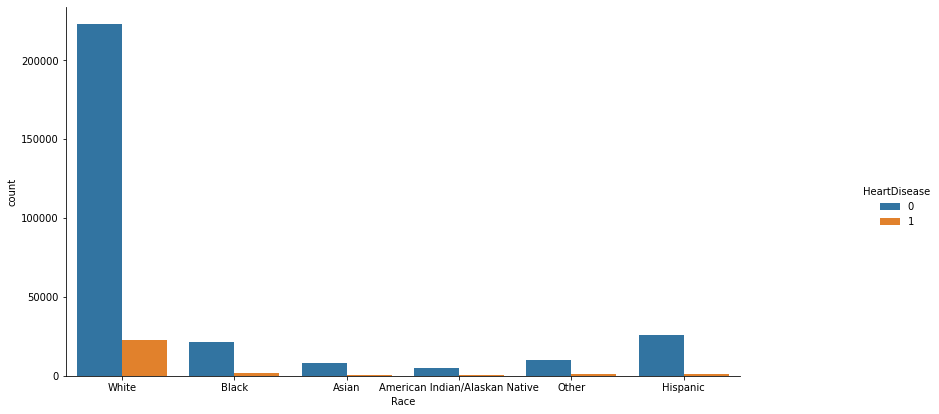

In [8]:
#Race plot
race = sns.catplot(x="Race", hue="HeartDisease", kind="count", data=raw_df)
plt.gcf().set_size_inches(15, 6)
plt.show()

## Feature Selection Process

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We notice that when we fit the LASSO regression, the coefficients for American Indian/Alaskan Native, Asian, Black, Hispanic, Other, Sleep time, and White variables are shrunk to 0. So, we don't include these features in our subset because they don't appear to be good predictors for Heart Disease.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As mentioned previously, race can be a very important factor when diagnosing many health concerns. One possible reason that all of the Race categories were shrunk to 0 is due to the proportion of White being so large.


In [9]:
#Set our predictors and out target outcome variables
#We want to determine which of these features is the best predictor of heart disease

prediction_var = df[['Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
                     'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'American Indian/Alaskan Native', 'Asian',
                     'Black', 'Hispanic', 'Other', 'White']]
target = df['HeartDisease']

In [10]:
#Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(prediction_var, target, test_size=.33, random_state=42)

In [11]:
#Determine the alpha value that has the lowest test MSE
alphas = np.logspace(-3,2,50)
training_rmse = []
test_rmse = []

for alpha in alphas:
    #train
    model=Lasso(alpha=alpha,  max_iter=1000,precompute=True)
    #training rmse
    score = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5) #cv=5 means k-fold CV with k=5
    rmse_score = np.sqrt(-score)
    training_rmse.append((rmse_score.mean()))
    #test rmse
    #model = model.fit(pred_test, tar_test)
    score = cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv=5)
    rmse_score = np.sqrt(-score)
    test_rmse.append(rmse_score.mean())

min_rmse = min(test_rmse)
print(min_rmse)
idx_min = test_rmse.index(min_rmse)

best_alpha = alphas[idx_min]
print(best_alpha)

0.2627056208897415
0.001


In [12]:
#Fit LASSO - we chose the alpha value that corresponds to the lowest test MSE
model=Lasso(alpha=.001,  max_iter=1000,precompute=True).fit(X_train,y_train)

In [13]:
#Print regression coef. 
#LASSO shrinks regression coef. to 0 for predictors that don't really make an impact
dict(zip(prediction_var.columns, model.coef_))


{'AgeCategory': 0.002585541706816383,
 'AlcoholDrinking': -0.0017673604417818589,
 'American Indian/Alaskan Native': 0.0,
 'Asian': -0.0,
 'Asthma': 0.014147192386609624,
 'Black': -0.0,
 'Diabetic': 0.067133488250619,
 'DiffWalking': 0.05240567643055084,
 'Hispanic': 0.0,
 'KidneyDisease': 0.08584031589872503,
 'MentalHealth': 0.0005609122673929406,
 'Other': -0.0,
 'PhysicalActivity': -0.005347083421684338,
 'PhysicalHealth': 0.002821345666748849,
 'Sex': 0.04720790407777599,
 'SkinCancer': 0.015052746563494458,
 'SleepTime': -0.0,
 'Smoking': 0.0209728662764217,
 'Stroke': 0.1650709257695049,
 'White': 0.0}

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We notice that the coefficiants for American Indian/Alaskan Native, Asian, Black, Hispanic, Other, Sleep time, and White variables are shrunk to 0. So, we don't include these features in our subset because they don't appear to be good predictors for Heart Disease. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As mentioned previously, race can be a very important factor in when diagnosing many health concerns. One possible reason that all of the Race categories were shrunk to 0 is due to the fact that proportion of White being so large. 

Now we want to compare training and testing MSE.

In [14]:
#Calculate training and testing MSE
# Consistent across training and testing, to make sure we're not overfitting

train_error = mean_squared_error(y_train, model.predict(X_train))
test_error = mean_squared_error(y_test, model.predict(X_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.06765439898559251
test data MSE
0.06902364688684637


We see that the training and testing errors are consistent, meaning that we suspect that we are not overfitting with this model.
Now, we look at the training and testing R-squared in order to determine how well our model fits. 

In [15]:
#Calculate training and testing R-squared
#Doesn't look like the LASSO Regression model explains much of the data, now to implement other classification models

rsquared_train=model.score(X_train,y_train)
rsquared_test=model.score(X_test,y_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.13067781192773564
test data R-square
0.12815584133552294


Our LASSO regression does not appear to fit our data very well. 

##Hyperparameter selection
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In our hyperparameter selections for decision tree and random forest we chose to tune for two hyperparameters which are optimum split and tree depth. For optimum split it was between two options which is gini impurity and entropy. For tree depth we chose 5 values, in the decision tree this was chosen to be 4,5,6,7,8 and in the random forest it was chosen to be 6,7,8,10,12. These numbers were chosen from a larger list of tree depth values but were reduced to decrease computational time. Tuning was done using grid search with a k-fold of 5 in order to find the best estimator; it performed an exhaustive search. For logistic regression, our hyperparameters were the type of solver used and the C which is the inverse regularization parameters. 


## Model Selection

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The base model that was used was decision trees due to prior studies stating that it is one of the most commonly used classifiers. In choosing the best model we chose accuracy as an important metric with a high weighted average f1-score. This is due to the dataset being heavily skewed towards people who do not have heart disease. Without the weighted average, the labels of people who don’t have heart disease dominated recall and precision, causing them to be very low. When having high accuracy and low f1-score it is an indicator that our dataset is heavily skewed which is why weighted averages are important to be able to see meaningful information without certain metrics being dominated by the largest amount of people in a certain label in this case people without heart disease. Specificity, precision, recall, and f1-score were the metrics that were evaluated in model selection, the higher scores the better. 

###Decision Tree
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the decision tree, our best accuracy using grid search was 0.913 with the best parameters as gini impurity for the tree splitter and a max tree depth of  4. Decision trees do not require feature scaling due to the fact that they are not sensitive to variance in our dataset, meaning they are invariant to the scaling of inputs. In plotting the mean score for testing and training vs candidates we are able to observe the weighted mean over each fold for each of the candidates. In plotting the standard deviation score vs candidates we are able to discern whether there is a wide standard deviation between each set of parameters. In these two plots the best parameter was the lowest training standard deviation and low training accuracy. However when looking at the test score, the best parameters resulted in the highest accuracy for the decision tree. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'HeartDisease'], df['HeartDisease'], test_size=0.33, random_state=42)

In [17]:
pipe = Pipeline([('dt_cls', DecisionTreeClassifier())])
param_grid = dict(dt_cls__criterion = ['gini', 'entropy'], dt_cls__max_depth = [4,5,6,7,8])
gscv = GridSearchCV(pipe, param_grid,n_jobs=-1,verbose=10,return_train_score=True)
gscv.fit(X_train, y_train)
print('Best Accuracy: ' + str(gscv.score(X_test, y_test)))
best_param = dict(criterion=gscv.best_estimator_.get_params()['dt_cls__criterion'],max_depth=gscv.best_estimator_.get_params()['dt_cls__max_depth'])
print('best parameters: ',best_param)
clf_pipe=Pipeline([('dt_cls', DecisionTreeClassifier(**best_param))])
clf_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 0.9137615722096406
best parameters:  {'criterion': 'gini', 'max_depth': 4}


Pipeline(steps=[('dt_cls', DecisionTreeClassifier(max_depth=4))])

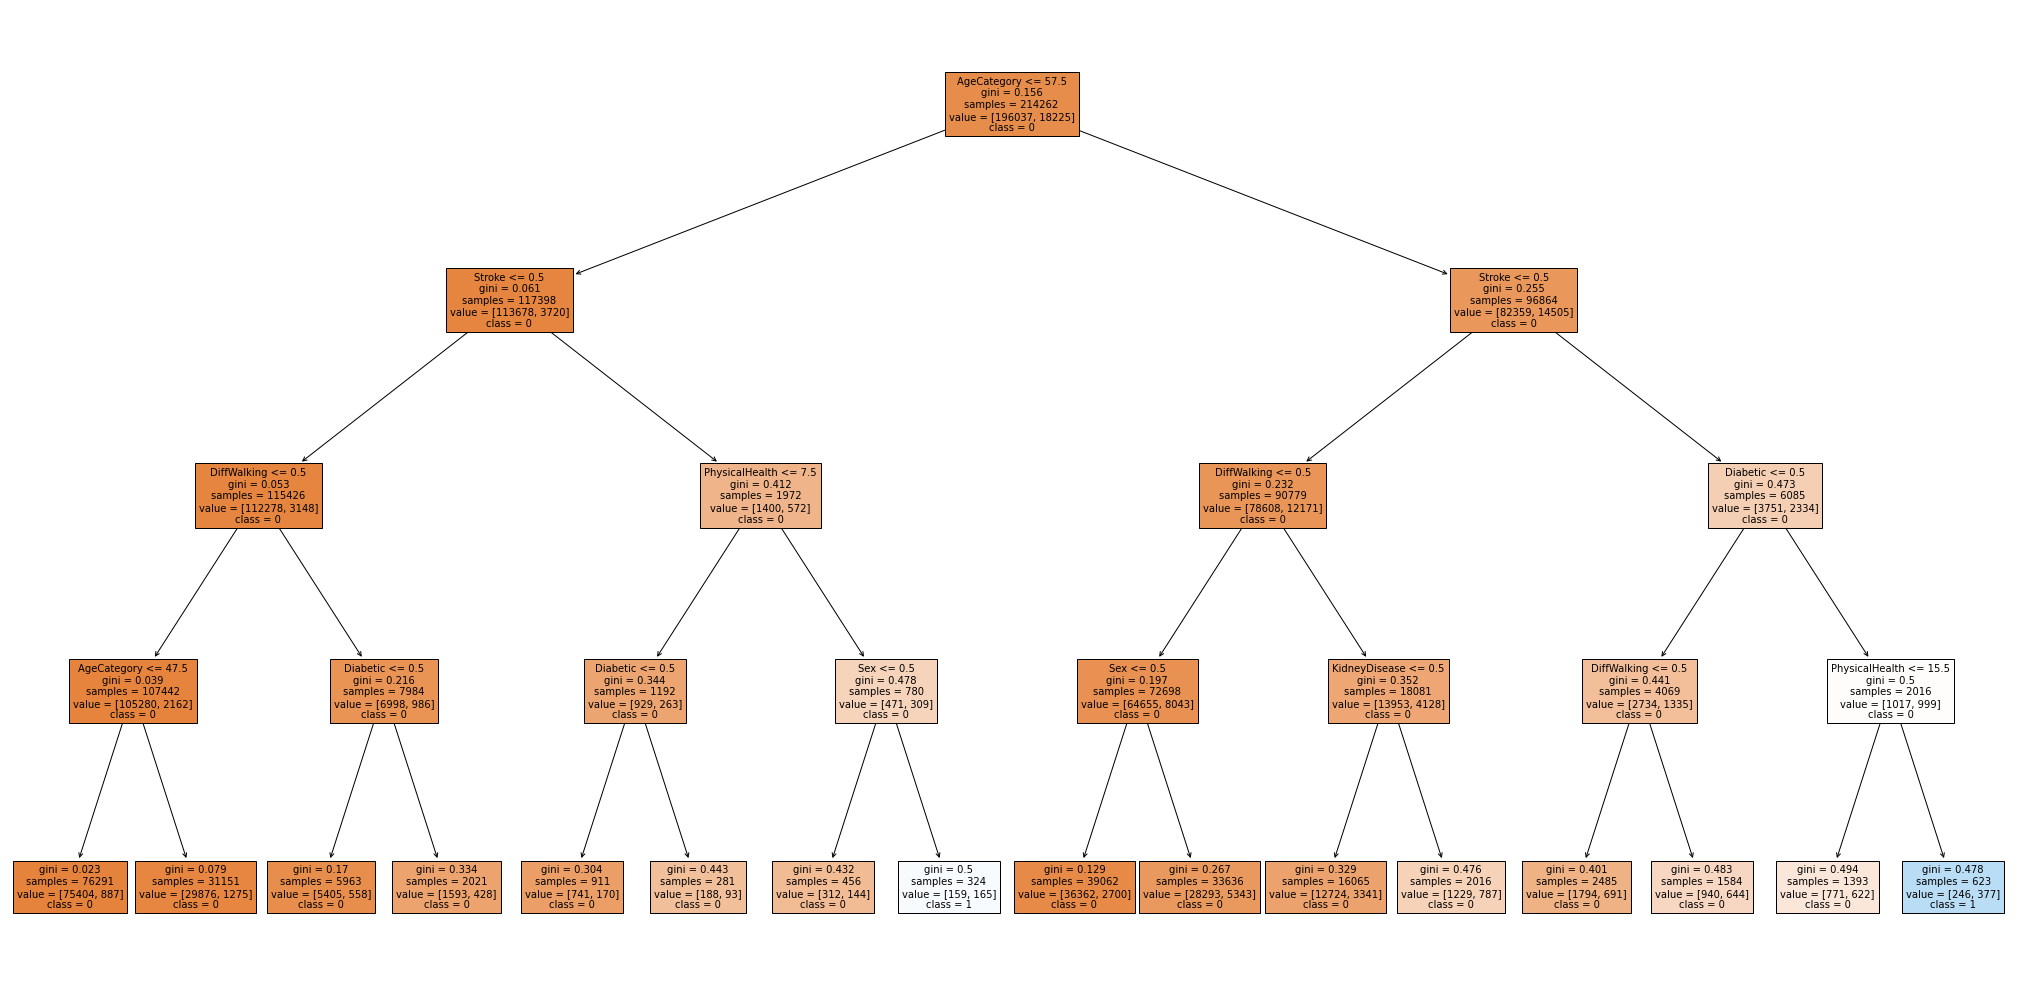

In [18]:
plt.figure(figsize=(36,18))  # set plot size (denoted in inches)
plot_tree(clf_pipe['dt_cls'], fontsize=10, feature_names=df.loc[:, df.columns != 'HeartDisease'].columns, class_names=["0","1"], filled=True,max_depth=4)
plt.show()

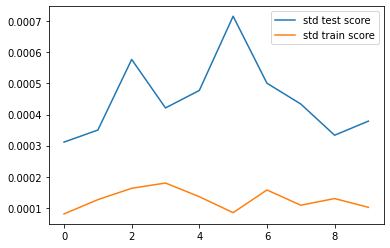

In [19]:
plt.plot(gscv.cv_results_['std_test_score'], label='std test score')
plt.plot(gscv.cv_results_['std_train_score'], label='std train score')
plt.legend(loc='best')
plt.show()

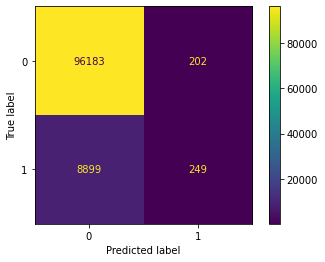

In [20]:
plot_confusion_matrix(clf_pipe, X_test, y_test)

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, clf_pipe.predict(X_test)).ravel()
specificity = (tn/(tn+fp)).astype('float64')
recall = (tp/(tp+fn)).astype('float64')
precision = (tp/(tp+fp)).astype('float64')
f1=(2*(precision*recall)/(precision+recall)).astype('float64')
print("specificity: " + str(specificity))
print("recall: " + str(recall))
print("precision: " + str(precision))
print("f1: " + str(f1))

specificity: 0.9979042382113399
recall: 0.027219064276344556
precision: 0.5521064301552107
f1: 0.05188040420877174


In [22]:
print(classification_report(y_test, clf_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95     96385
           1       0.55      0.03      0.05      9148

    accuracy                           0.91    105533
   macro avg       0.73      0.51      0.50    105533
weighted avg       0.88      0.91      0.88    105533



### Random Forest
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the random forest, our best accuracy using grid search was 0.914 with the best parameters as gini impurity for the tree splitter and a max tree depth of 10. Since a random forest is a collection of decision trees that randomly selects observations and features to build a collection of trees and average the results. Therefore, random forests also do not require feature scaling due to the similarities between the two models. In plotting the standard deviation score vs candidates we are able to discern whether there is a wide standard deviation between each set of parameters. In these two plots the best parameter was the highest training standard deviation and upper training accuracy. However, when looking at the test score, the best parameters resulted in the second highest accuracy for the random forest

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'HeartDisease'], df['HeartDisease'], test_size=0.33, random_state=42)

In [24]:
pipe = Pipeline([('rf_cls', RandomForestClassifier())])
param_grid = dict(rf_cls__criterion = ['gini', 'entropy'], rf_cls__max_depth = [6,7,8,10,12])
gscv = GridSearchCV(pipe, param_grid,n_jobs=-1,verbose=10,return_train_score=True)
gscv.fit(X_train, y_train)
print('Best Accuracy: ' + str(gscv.score(X_test, y_test)))
best_param = dict(criterion=gscv.best_estimator_.get_params()['rf_cls__criterion'],max_depth=gscv.best_estimator_.get_params()['rf_cls__max_depth'])
print('best parameters: ',best_param)
clf_pipe=Pipeline([('rf_cls', RandomForestClassifier(**best_param))])
clf_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 0.9145670074763345
best parameters:  {'criterion': 'gini', 'max_depth': 10}


Pipeline(steps=[('rf_cls', RandomForestClassifier(max_depth=10))])

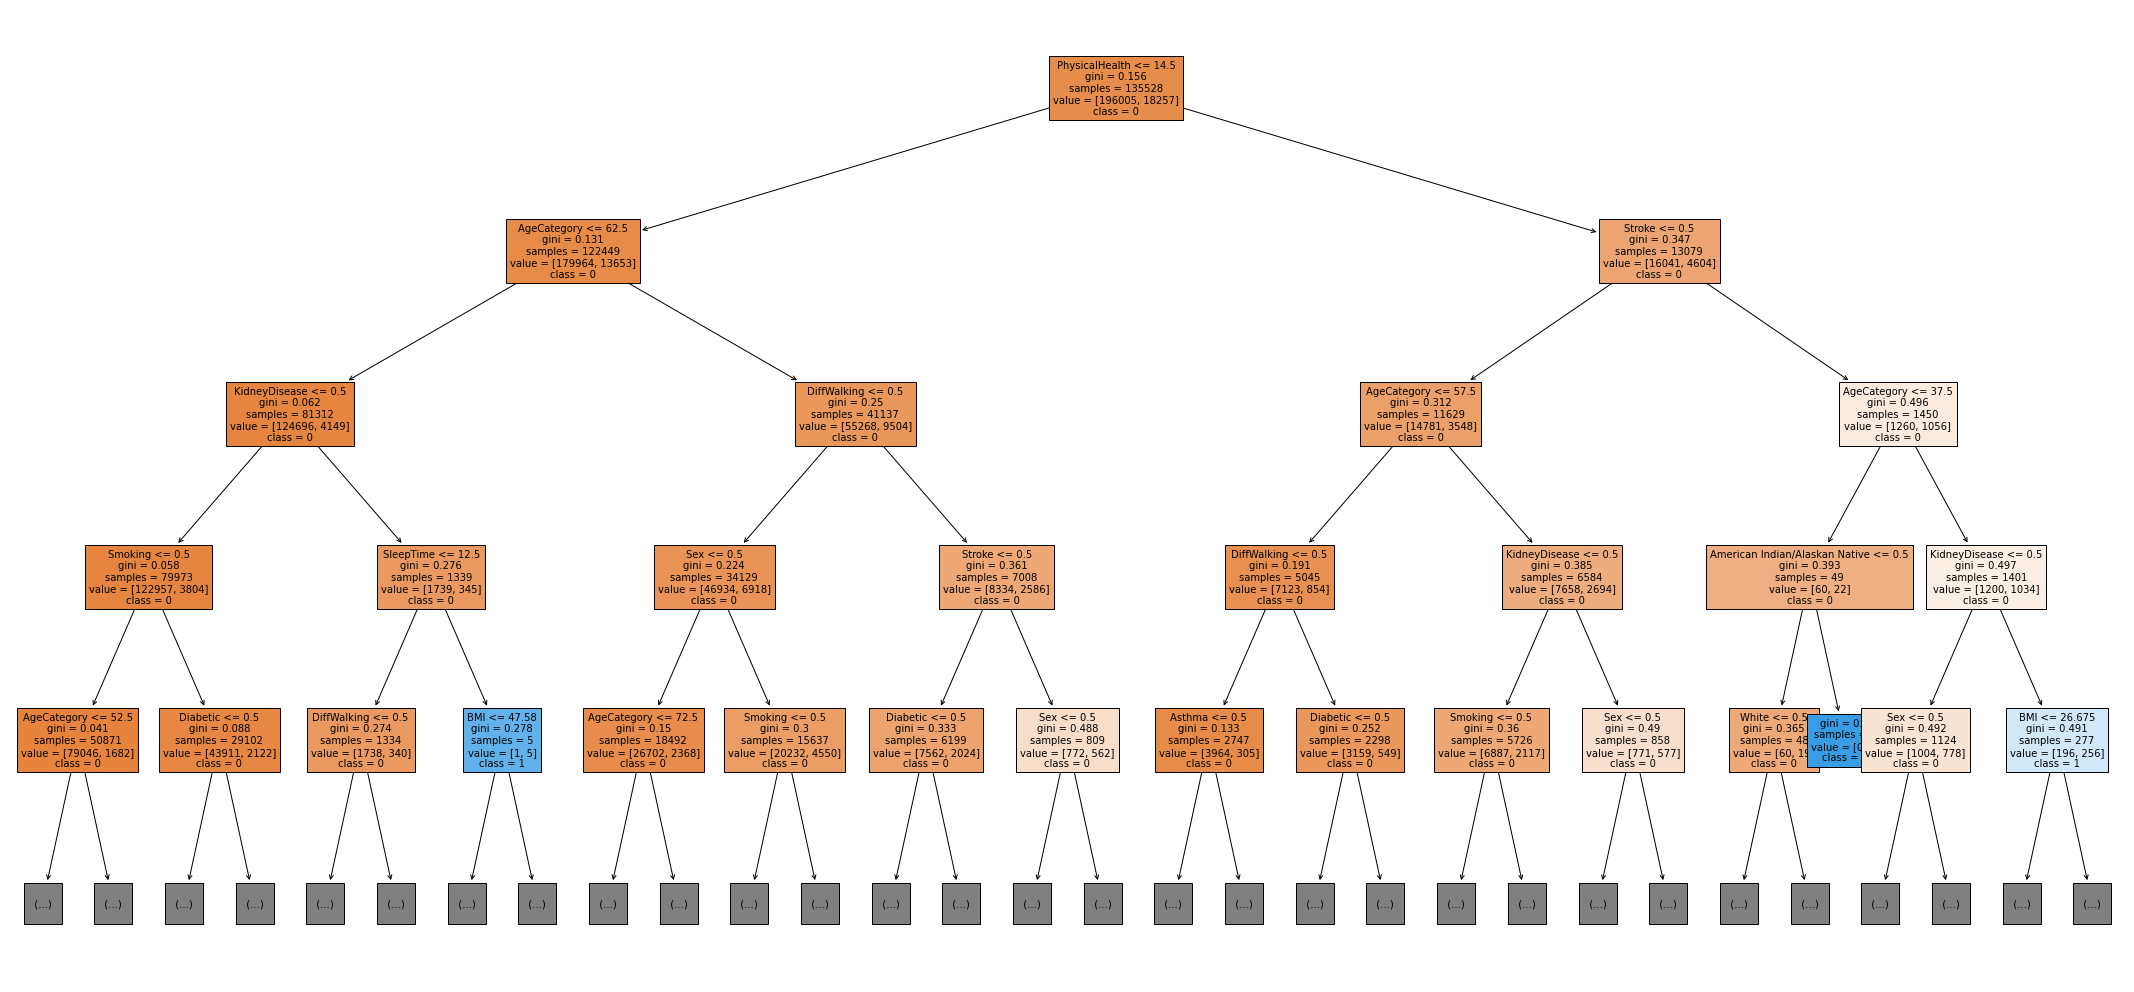

In [25]:
plt.figure(figsize=(38,18))  # set plot size (denoted in inches)
plot_tree(clf_pipe['rf_cls'].estimators_[0], fontsize=10, feature_names=df.loc[:, df.columns != 'HeartDisease'].columns, class_names=["0","1"], filled=True,max_depth=4)
plt.show()

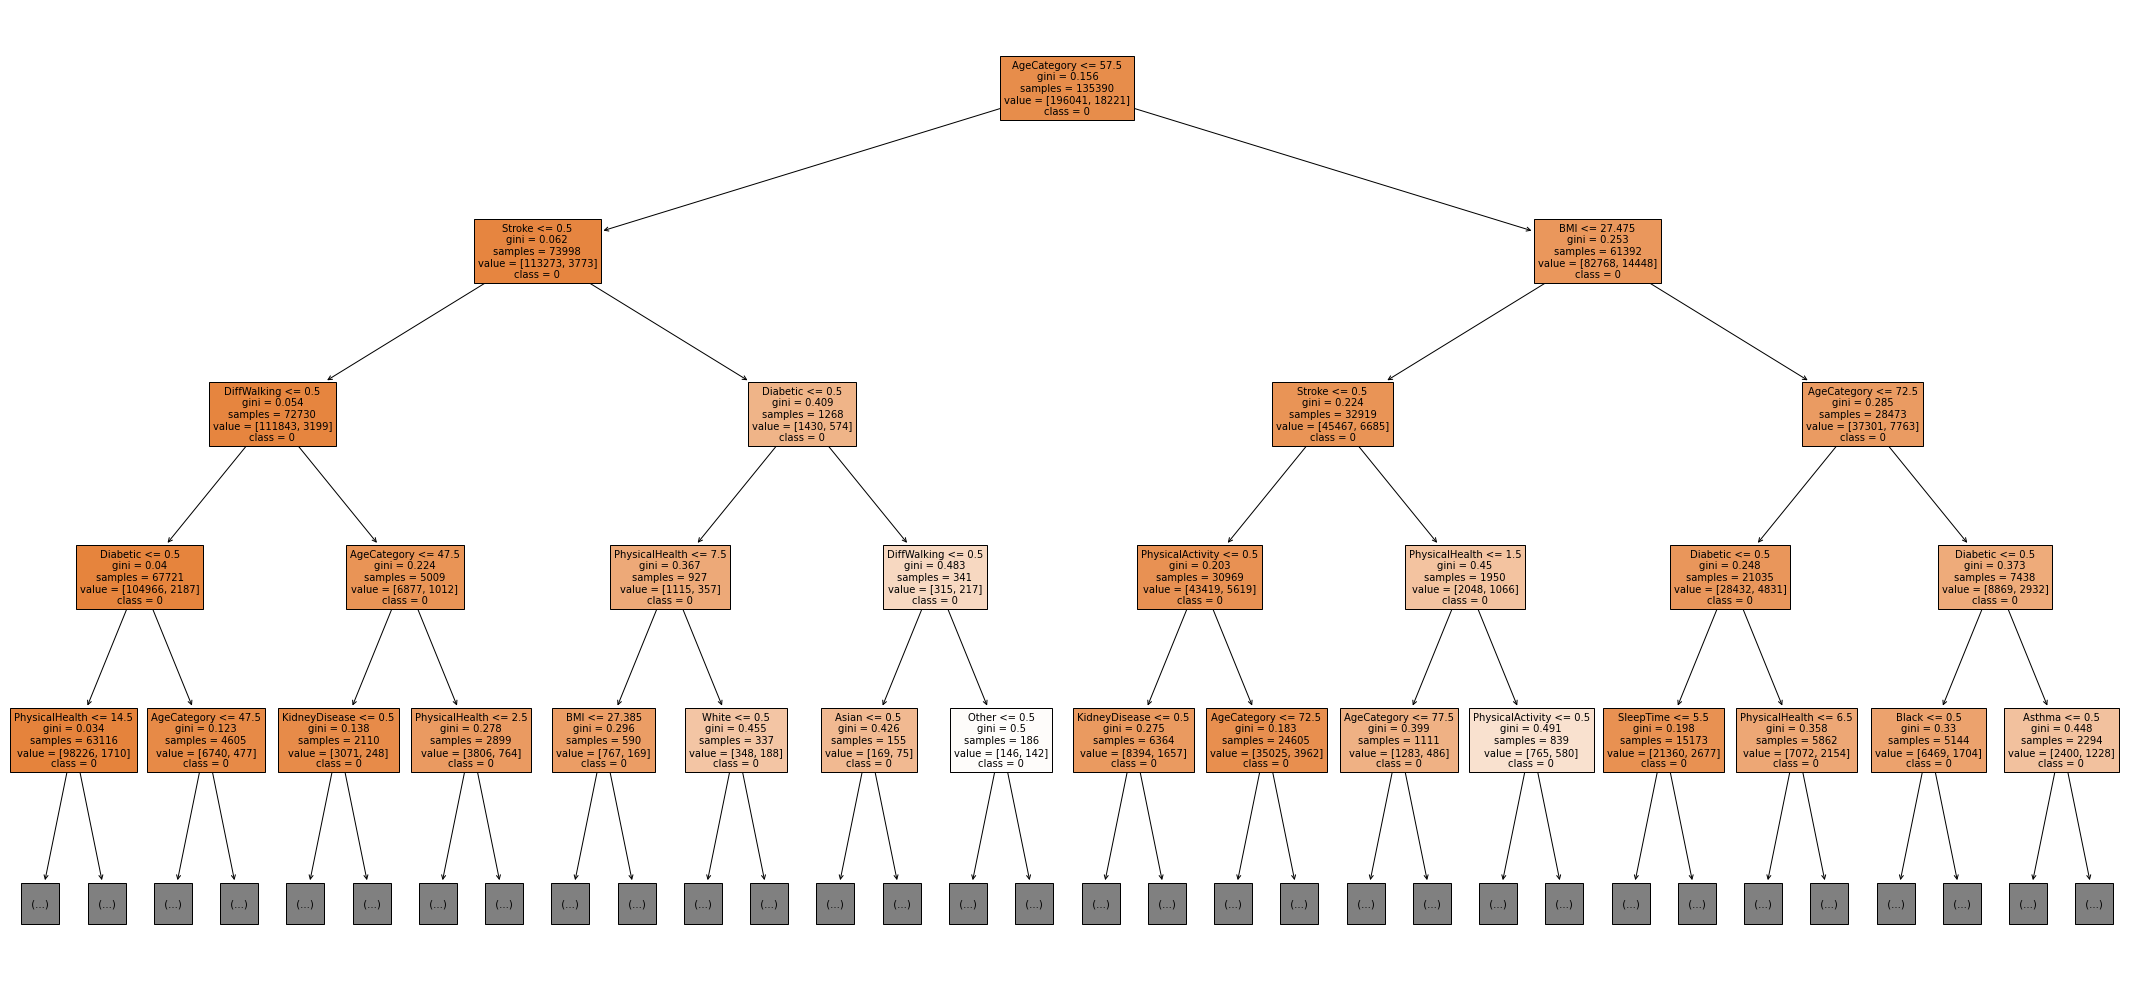

In [26]:
plt.figure(figsize=(38,18))  # set plot size (denoted in inches)
plot_tree(clf_pipe['rf_cls'].estimators_[1], fontsize=10, feature_names=df.loc[:, df.columns != 'HeartDisease'].columns, class_names=["0","1"], filled=True,max_depth=4)
plt.show()

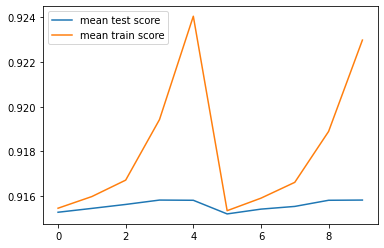

In [27]:
plt.plot(gscv.cv_results_['mean_test_score'], label='mean test score')
plt.plot(gscv.cv_results_['mean_train_score'], label='mean train score')
plt.legend(loc='best')
plt.show()

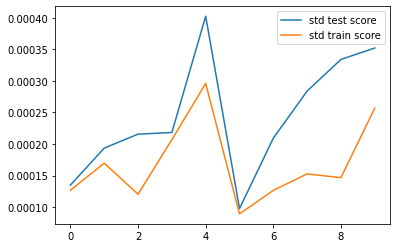

In [28]:
plt.plot(gscv.cv_results_['std_test_score'], label='std test score')
plt.plot(gscv.cv_results_['std_train_score'], label='std train score')
plt.legend(loc='best')
plt.show()

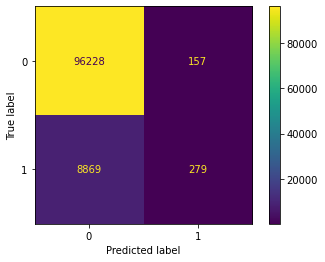

In [29]:
plot_confusion_matrix(clf_pipe, X_test, y_test);

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, clf_pipe.predict(X_test)).ravel()
specificity = (tn/(tn+fp)).astype('float64')
recall = (tp/(tp+fn)).astype('float64')
precision = (tp/(tp+fp)).astype('float64')
f1=(2*(precision*recall)/(precision+recall)).astype('float64')
print("specificity: " + str(specificity))
print("recall: " + str(recall))
print("precision: " + str(precision))
print("f1: " + str(f1))

specificity: 0.9983711158375266
recall: 0.0304984696108439
precision: 0.6399082568807339
f1: 0.058222036727879796


In [31]:
print(classification_report(y_test, clf_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     96385
           1       0.64      0.03      0.06      9148

    accuracy                           0.91    105533
   macro avg       0.78      0.51      0.51    105533
weighted avg       0.89      0.91      0.88    105533



### Logistic Regression
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For logistic regression our best accuracy using grid search was 0.913 with the best parameters using the C as 1 and solver was newton-cg. Logistic regression requires feature scaling due to it being sensitive to variance in the inputs. This is due to certain values being larger than others like weight and age which isn’t inherently more important than other variables like sex which is o or 1. In plotting the standard deviation score vs candidates we are able to discern whether there is a wide standard deviation between each set of parameters..  In these two plots it was relatively similar mean scores and standard deviation for training for our best parameter compared to the rest.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'HeartDisease'], df['HeartDisease'], test_size=0.33, random_state=42)
clf_pipe = Pipeline([('scaler', StandardScaler()), ('reg', LogisticRegression(n_jobs=-1))])
param_grid = dict(reg__solver = ['newton-cg', 'lbfgs', 'liblinear'],
                  reg__C = [1,10,100])
gscv = GridSearchCV(clf_pipe, param_grid,n_jobs=-1, return_train_score=True)
gscv.fit(X_train, y_train)
gscv.score(X_test, y_test)
print('Best Accuracy: ' + str(gscv.score(X_test, y_test)))
best_param = dict(solver=gscv.best_estimator_.get_params()['reg__solver'],C=gscv.best_estimator_.get_params()['reg__C'])
print('best parameters: ',best_param)
clf_pipe=Pipeline([('reg', LogisticRegression(**best_param))])
clf_pipe.fit(X_train, y_train)

Best Accuracy: 0.9137520965006206
best parameters:  {'solver': 'newton-cg', 'C': 1}


Pipeline(steps=[('reg', LogisticRegression(C=1, solver='newton-cg'))])

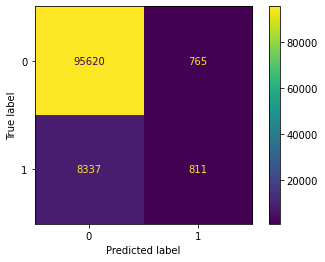

In [33]:
plot_confusion_matrix(clf_pipe, X_test, y_test);

In [34]:
tn, fp, fn, tp = confusion_matrix(y_test, clf_pipe.predict(X_test)).ravel()
specificity = (tn/(tn+fp)).astype('float64')
recall = (tp/(tp+fn)).astype('float64')
precision = (tp/(tp+fp)).astype('float64')
f1=(2*(precision*recall)/(precision+recall)).astype('float64')
print("specificity: " + str(specificity))
print("recall: " + str(recall))
print("precision: " + str(precision))
print("f1: " + str(f1))

specificity: 0.992063080354827
recall: 0.08865325754263227
precision: 0.5145939086294417
f1: 0.15124953375606118


In [35]:
print(classification_report(y_test, clf_pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     96385
           1       0.51      0.09      0.15      9148

    accuracy                           0.91    105533
   macro avg       0.72      0.54      0.55    105533
weighted avg       0.88      0.91      0.88    105533



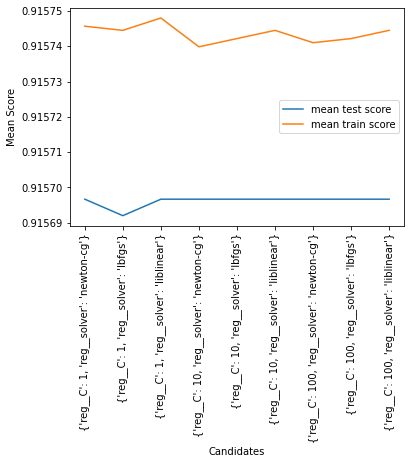

In [36]:
plt.plot(gscv.cv_results_['mean_test_score'], label='mean test score')
plt.plot(gscv.cv_results_['mean_train_score'], label='mean train score')
plt.xlabel("Candidates")
plt.ylabel("Mean Score")
plt.xticks(range(len(gscv.cv_results_['mean_test_score'])), labels=gscv.cv_results_['params'])
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

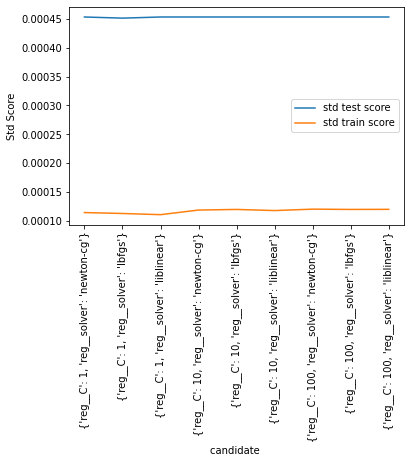

In [37]:
plt.plot(gscv.cv_results_['std_test_score'], label='std test score')
plt.plot(gscv.cv_results_['std_train_score'], label='std train score')
plt.xlabel("candidate ")
plt.ylabel("Std Score")
plt.xticks(range(len(gscv.cv_results_['mean_test_score'])), labels=gscv.cv_results_['params'])
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

## Discussion

## Interpreting the Results
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; LASSO Regression signified the important features in our data set.
“Stroke”, “Kidney Disease”, and “Diabetic” were the top three features with the most significance. Indicated by the largest weights which by results will have the highest decision indicator of heart disease. Race (American Indian/Alaskan Native, Asian, Black, Hispanic, Other) wasn't a significant decision indicator of heart disease. Weights approximately in the zero mark. Sleep Time: The only daily habit feature that reached the weight of 0, indicating it’s not a significant decision indicator of heart disease. R-square value represents a statistical measure that represents the proportion of the variance for a dependent variable (Heart Disease) that's explained by independent variables (Stroke, Diabetic….). The R-square value of the training data is 12.8% and of the testing data 12.8%. Our R-squared is relatively low compared to our expected benchmark values. We can Infer a Lasso Regression model is not an interpretable model for our dataset.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Decision Trees split on the most significant leaves. The Visual shows Age Category of 57 and greater was the first split. Following the second split is the Stroke variable. Lastly, if the participant struggled with walking, their personal rating of physical health, and being diabetic. To achieve this level of accuracy, we calculated training and testing Mean Squared Error (MSE) to ensure the model was consistent across training and testing to avoid overfitting. These values both were approximately 8.5%. This low value was a good indicator. The accuracy of the Decision Tree model was 91.4% (testing data). This is near our benchmark value.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Random Forest, our second DT model of our classification , was implemented by a pipeline in combination with Grid Search Cross Validation. The most important split was the personal rating of physical health (<= 7.5), the secondary split was between if the participant has had a stroke and personal rating of physical activity. This model has a specificity value is the proportion of true negatives that are correctly predicted by the model is high, approx at 99.6% we see our model accurately predicts true negatives. This is key since we don’t want our model to misclassify people to have heart disease when they are not truly positive. The model’s recall value is at 4.3% which indicates how many of the true positives were recalled, i.e. how many of the correct hits were also found. This is significantly lower than our expected benchmark since the model is not accurately finding the participants who actually have heart disease. The model’s precision value is approximately 54.5% and f1 value at 8.1%. We learn from these values that Random Forest is not the best model for Heart Disease Classification with our given dataset.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After our implementation of a variety of classification models, we have come to the conclusion that none of these models would be viable candidates for real-world applications. We ran into multiple issues with our dataset that would cause ethical concerns and misdiagnoses, despite the fact that the sensitivity of the model being really high.
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The first issue we faced was a disproportionate representation of race: the number of datapoints pertaining to White individuals towered over that pertaining to people of color. While this mirrors a real ethical issue we can observe in the world, the disproportionate representation also caused us to discard “race” from the features used in the models when we were exploring our feature selection. While we are not confident on what the ramifications of this action was on our models, it stands to reason that race plays a pivotal role in an individual’s family history, habits and their overall livelihoods. Making the decision to exclude this aspect not only undermines our goal to find an effective and accurate model for the real world, but also creates a dangerous hypothetical that leads to unnecessary grief and financial damage to communities of color.   
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The second issue we faced was a natural bias in healthcare data. As our group was delving deeper into the project, we started noticing that the recall score produced by our models for negative labels (people who do not have heart disease) were near 1.0, while the recall score for positive labels were around 0.05. After a look at the training data, we realized that this issue could have been the result of the fact that 91% of all data points had negative labels. This means that if a model predicts a negative label for every datapoint, it would be correct 91% of the time, which reflects the tight range of accuracy values found in the model selection. Even by tuning GridSearchCV to find the highest recall score, we were left with an optimization that was only marginally better than the baseline. One of the proposed solutions to this problem was to balance out the number of positive and negative labels in the training set by oversampling the positive label. However, doing so meant that we would have to train the models again, and this was an unfavorable position to be in because of the time constraints of this project. Given this dilemma, we collectively decided that while we missed our original goal of optimizing the false negatives, we should still choose the highest performing model in this circumstance.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;If we had to choose a model that performed the best, it would be the Random Forest model because it had the highest accuracy. The weighted averages of all the models are very similar, so we would choose the model with the best accuracy. We anticipate that if we were to construct a more balanced dataset, in terms of both race and heart disease diagnoses, then this would be the model that would be best suited for classifying individuals with heart disease. Additionally, a more balanced dataset may bring changes in our selected features which could potentially lead to more accurate predictions since we understand race tends to be an important factor in many healthcare scenarios. Utilizing a more balanced dataset would also mitigate some ethical concerns, such as misdiagnosing a larger proportion of non-white patients.  
  
  
## Limitations
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One area of concern with our data is that it is primarily based on the white population, with any other races being a small portion of the data. This is a problem as it makes it much more likely to misdiagnose people of color due to the models being trained on the primarily white data, which of course can be dangerous as it may lead to wrong results that can cause harm both physically and financially. Ideally we would like our data to have an equal number of samples across different race populations in order to better generalize our model and its accuracy for all races.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A more technical limitation we encountered is that due to time constraints, we were unable to explore SVM as a predictive model in a meaningful fashion. When we first set out to perform a gridsearch for SVM, we constantly ran into memory leak problems. To troubleshoot this, we started removing one parameter at a time before running so we could acquire the most amount of parameters our computers can handle. Doing so left us with one RBF kernel and one fold, which took 45 minutes to complete. We sought to include this information in the final report, but we found that the metric it was reporting was inconsistent and poorly optimized to how little it was working with. But because of a high time complexity of $\omega (n^3)$ and the necessary inclusion of more folds to optimize the model further, we decided that this approach could not provide better results in the scope of the time we had for this project. With more time and better hardware available, we expect to observe better results since we would be able to optimize the model better with more than one fold of one kernel.



# **Ethics & Privacy**
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will be using personal health data which has major privacy and ethical concerns. The dataset we have chosen doesn't include any names or identifiable attributes for the participants, which mitigates some privacy concerns. For future use of our model, all identifiable information would need to be taken out before using personal data. Lastly, the project deals with diagnosis of a medical condition and thus would have to follow all HIPAA standards.  
  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;There is also a potential ethical concern if an individual is told by our model that they have heart disease but actually do not. This could create a health scare and the individual may have grounds to sue for emotional damages. Prior to any sort of implementation of our model, we would need to ensure a high level of accuracy to avoid the possibility of misdiagnosing a patient and creating unnecessary fear. Along this same point, we would need to focus on preventing our model from classifying an individual to not have heart disease, when in reality, they do. This could potentially lead to much more serious health concerns if they are left untreated and could possibly result in an earlier death without proper treatment/care.  
   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We’ve seen throughout the exploration of this data that there is a large majority of data from White patients. Thus, our model is much more likely to misdiagnose people of color which poses a huge ethical concern. Therefore, this model would have very dangerous consequences if it were to be implemented in actual healthcare settings.  


# Conclusion
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Despite being able to implement high-accuracy models that could pretty successfully classify patients without heart disease, we recognize that none of our models accomplished our goal of minimizing the false negatives. Further work would need to be done in order to present a model that does well at correctly categorizing individuals with and without heart disease. We anticipate that constructing a more balanced data would lead to an alternate subset of features being selected and ultimately a better fitting model. Based on our current exploration of the data, we believe that the random forest model would produce the best outcome since it had the highest accuracy in this case. However, further investigation will need to be done in order to determine which model is truly best suited for minimizing false negatives. Only from using a better suited dataset will we be able to implement a model that minimizes both false negatives and potential ethical concerns.


# **Footnotes**
<a name="lorenznote"></a>1.[^](#lorenz): Pytlak, Kamil. “Personal Key Indicators of Heart Disease.” Kaggle, Centers for Disease Control and Prevention, 16 Feb. 2022, https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. birds-arent-real-gen-z-misinformation.html<br> 

<a name="admonishnote"></a>2.[^](#admonish): Asha Rajkumar, and Mrs G. Sophia Reena, 2010, “Diagnosis of Heart Disease using Data Mining Algorithms”,Global Journal of Computer Science and Technology,Vol. 10,Issue 10, pp.38-43, September. <br> 

<a name="admonishnote"></a>3.[^](#admonish): M. Gudadhe, K. Wankhade and S. Dongre, "Decision support system for heart disease based on support vector machine and Artificial Neural Network," 2010 International Conference on Computer and Communication Technology (ICCCT), 2010, pp. 741-745, doi: 10.1109/ICCCT.2010.5640377.<br>

<a name="admonishnote"></a>4.[^](#admonish): Serdar AYDIN, Meysam Ahanpanjeh,and Sogol Mohabbatiyan,February 2016, “Comparison And Evaluation of Data Mining Techniques in the Diagnosis of Heart Disease”, International Journal on Computational Science & Applications (IJCSA), Vol. 6,No.1, pp. 1-15. <br> 


# **Citations & References**

Pytlak, Kamil. “Personal Key Indicators of Heart Disease.” Kaggle, Centers for Disease Control and Prevention, 16 Feb. 2022, https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. 

Asha Rajkumar, and Mrs G. Sophia Reena, 2010, “Diagnosis of Heart Disease using Data Mining Algorithms”,Global Journal of Computer Science and Technology,Vol. 10,Issue 10, pp.38-43, September.

M. Gudadhe, K. Wankhade and S. Dongre, "Decision support system for heart disease based on support vector machine and Artificial Neural Network," 2010 International Conference on Computer and Communication Technology (ICCCT), 2010, pp. 741-745, doi: 10.1109/ICCCT.2010.5640377.

Serdar AYDIN, Meysam Ahanpanjeh,and Sogol Mohabbatiyan,February 2016, “Comparison And Evaluation of Data Mining Techniques in the Diagnosis of Heart Disease”, International Journal on Computational Science & Applications (IJCSA), Vol. 6,No.1, pp. 1-15.

